## Workshop 4
### File Input and Output (I/O)

**Submit this notebook to bCourses (ipynb and pdf) to receive a grade for this Workshop.**

Please complete workshop activities in code cells in this iPython notebook. The activities titled **Practice** are purely for you to explore Python. Some of them may have some code written, and you should try to modify it in different ways to understand how it works. Although no particular output is expected at submission time, it is _highly_ recommended that you read and work through the practice activities before or alongside the exercises. However, the activities titled **Exercise** have specific tasks and specific outputs expected. Include comments in your code when necessary. Enter your name in the cell at the top of the notebook. The workshop should be submitted on bCourses under the Assignments tab.

[Exercises start here](#exercises)

In this notebook, we're going to explore some ways that we can store data in files, and extract data from files. Let's just get all of the importing out of the way:

In [39]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## Practice: Basic Writing and Reading ASCII Files

Think of ASCII files as text files. You can open them using a text editor (like vim or emacs in Unix, or Notepad in Windows) and read the information they contain directly. There are a few ways to produce these files, and to read them once they've been produced. In Python, the simplest way is to use file objects. 

Let's give it a try. We create an abstract file object by calling the function `open( filename, access_mode )` and assigning its return value to a variable (usually `f`). The argument `filename` just specifices the name of the file we're interested in, and `access_mode` tells Python what we plan to do with that file:  

    'r': read the file  
    'w': write to the file (creates a new file, or clears an existing file)
    'a': append the file  
     
Note that both arguments should be strings.
For full syntax and special arguments, see documentation at https://docs.python.org/2/library/functions.html#open

In [2]:
f = open( 'welcome.txt', 'w' )

**A note of caution**: as soon as you call `open()`, Python creates a new file with the name you pass to it if you open it in write mode (`'w'`). Python will overwrite existing files if you open a file of the same name in write ('`w`') mode.

Now we can write to the file using `f.write( thing_to_write )`. We can write anything we want, but it must be formatted as a string.

In [3]:
topics = ['Data types', 'Loops', 'Functions', 'Arrays', 'Plotting', 'Statistics']

In [4]:
f.write( 'Welcome to Physics 77, Fall 2019\n' ) # the newline command \n tells Python to start a new line
f.write( 'Topics we will learn about include:\n' )
for top in topics:
    f.write( top + '\n')
f.close()                                         # don't forget this part!

**Practice 1:** Use the syntax you have just learned to create an ASCII file titled "`sine.txt`" with two columns containing 20 x and 20 y values. The x values should range from $0$ to $2\pi$ - you can use `np.linspace()` to generate these values (as many as you want). The y values should be $y = sin(x)$ (you can use `np.sin()`) for this. Then, use a `for` loop as above to write a new line for each pair of x and y values. To make sure that each x,y pair is on a new line, remember to add `\n` to the end of each line like above. To separate the values by a tab so that the columns are nicely aligned, you can use the "character" `\t`.  So `\n` inserts a new line and `\t` inserts a tab. You may wish to use some kind of string formatting to decimals from running too far. Here is an example with just one data point:

    x = 0.5 * np.pi
    y = np.sin(x)
    print("%.5f \t %.5f" % (x,y))

Pay close attention to the fact that when you use the `write` function, the argument that you pass to it needs to be a string.

In [5]:
f = open('sine.txt', 'w')
x = np.linspace(0, 2*np.pi, 20)
y = np.sin(x)

#for v in x:
    #f.write(v +'\n')
    
#for j in y:
    #f.write(j + '\n')


for i in range(20):
    #print(x[i], y[i] )
    print("%.5f \t %.5f" % (x[i],y[i])) 
    print("%.5f \t %.5f" % (x[i],y[i]) , file=f)
    #s = '%.5f \t %.5f' % (x[i],y[i])
    #f.write(s+'\n')
f.close()

0.00000 	 0.00000
0.33069 	 0.32470
0.66139 	 0.61421
0.99208 	 0.83717
1.32278 	 0.96940
1.65347 	 0.99658
1.98416 	 0.91577
2.31486 	 0.73572
2.64555 	 0.47595
2.97625 	 0.16459
3.30694 	 -0.16459
3.63763 	 -0.47595
3.96833 	 -0.73572
4.29902 	 -0.91577
4.62972 	 -0.99658
4.96041 	 -0.96940
5.29110 	 -0.83717
5.62180 	 -0.61421
5.95249 	 -0.32470
6.28319 	 -0.00000


Now we will show how to *read* the values from `welcome.txt` back out:

In [6]:
f = open( 'welcome.txt', 'r' )
for line in f:
    print(line)
f.close()

# after removing the .strip(), the space between the lines grew

Welcome to Physics 77, Fall 2019

Topics we will learn about include:

Data types

Loops

Functions

Arrays

Plotting

Statistics



**Practice 2:** In the cell immediately above, you see that we print `line.strip()` instead of just printing `line`. Remove the `.strip()` part and see what happens. 

Suppose we wanted to skip the first two lines of `welcome.txt` and print only the list of topics `('Data types', 'Loops', 'Functions', 'Arrays', 'Plotting', 'Statistics')`. We can use `readline()` to "read" the first two lines but not store their value, thereby ignoring them.

In [7]:
f = open( 'welcome.txt', 'r' )
f.readline()
f.readline() # skip the first two lines
topicList = []
for line in f:
    topicList.append(line.strip())
f.close()
print(topicList)

['Data types', 'Loops', 'Functions', 'Arrays', 'Plotting', 'Statistics']


Python reads in spacing commands from files as well as strings. The `.strip()` just tells Python to ignore those spacing commands. What happens if you remove it from the code above?

**Practice 3:** Use the syntax you have just learned to read back each line of x and y values from the `sine.txt` file that you just wrote in Practice 1. Don't worry about breaking up the lines into individual values quite yet.

In [8]:
#del x,y 
f = open('sine.txt', 'r' )
x_values = []
y_values  = []
for i in f:
    #x = [line.strip() for i in x]
    #x_values.append(x)
    print(i)
f.close()


0.00000 	 0.00000

0.33069 	 0.32470

0.66139 	 0.61421

0.99208 	 0.83717

1.32278 	 0.96940

1.65347 	 0.99658

1.98416 	 0.91577

2.31486 	 0.73572

2.64555 	 0.47595

2.97625 	 0.16459

3.30694 	 -0.16459

3.63763 	 -0.47595

3.96833 	 -0.73572

4.29902 	 -0.91577

4.62972 	 -0.99658

4.96041 	 -0.96940

5.29110 	 -0.83717

5.62180 	 -0.61421

5.95249 	 -0.32470

6.28319 	 -0.00000



### Practice Reading in Numerical Data as Floats

Numerical data can be somewhat trickier to read in than strings. In the practices above, you read in `sine.txt` but each line was a `string` not a pair of `float` values. Let's read in a file I produced in another program, that contains results from a BaBar experiment, where we searched for a "dark photon" produced in e+e- collisions. The data are presented in two columns: 

    mass    charge

Every time we read in a new line, it is going to start out being a `string`. To convert a line like

    1.57079      1.00000
    
into a pair of values we need to do two things. The first is we need to split that string into two pieces. Fortunately, there is a function to do that for us. Suppose that we read in a `line` and we want to split it. We can do it as follows:

    line.split()

For the line above, calling `.split()` would return the following `list`:

    ['1.57079','1.00000']
    
From there, we need to convert each value in the list into a `float` and store those values somewhere. This can be done using the `float()` function:

    x_values = []
    y_values = []
    split_values = ['1.57079','1.00000']
    x_values.append(float(split_values[0]))
    y_values.append(float(split_values[1]))

Now `x_values` is a `list` containing 1 element which is the `float` value `1.57079` and `y_values` is a `list` containing 1 element which is the `float` value `1.00000`.

In [9]:
# Example using BaBar_2016.dat

f = open('BaBar_2016.dat', 'r')
# read each line, split the data wherever there's a blank space,
# and convert the values to floats

# lists where we will store the values we read in
mass = []
charge = []
for line in f:
    tokens = line.split()
    mass.append(float(tokens[0]))
    charge.append(float(tokens[1]))
f.close()

We got it; let's plot it!

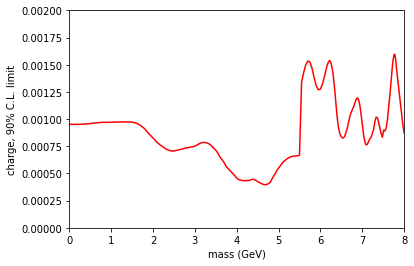

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(mass, charge, 'r-' )
plt.xlim(0, 8)
plt.ylim(0, 2e-3)
plt.xlabel('mass (GeV)')
plt.ylabel('charge, 90% C.L. limit')
plt.show()

**Practice 4:** Use the syntax you have just learned to read back each line of x and y values from the sine.txt file that you wrote in Practice 1, and split each line into `float` values and store them. Then, plot your stored x and y values to make sure you have done everything correctly

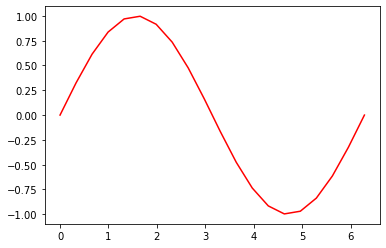

In [11]:
f = open('sine.txt', 'r')

X_values = []
Y_values = []

for line in f:
    tokens = line.split()
    X_values.append(float(tokens[0]))
    Y_values.append(float(tokens[1]))
    #print(line)
    #print(tokens)
f.close()
#print(x_values)
#print(y_values)


plt.plot(X_values, Y_values, 'r')


Of course, you already know of another way to read in values like this: `numpy.loadtxt()` and `numpy.genfromtxt()`. If you have already been using those, feel free to move on. Otherwise, take a moment to make yourself aware of these functions as they will massively simplify your life.

Fortunately, Python's `numpy` library has functions for converting file information into numpy arrays, which can be easily analyzed and plotted. The above can be accomplished with a lot less code (and a lot less head scratching!)

The `genfromtxt` function takes as it's argument the name of the file you want to load, and any optional arguments you want to add to help with the loading and formatting process. Some of the most useful optional arguments are:  

  **dtype**: data type of the resulting array  
  **comments**: the character that indicates the start of a comment (e.g. '#')  
              lines following  these characters will be ignored, and not read into the array  
  **delimiter**: the character used to separate values. Often, it's whitespace,   
   but it could also be ',', '|', or others  
  **skip_header**: how many lines to skip at the beginning of the file  
  **skip_footer**: how many lines to skip at the end of the file  
  **use_cols**: which columns to load and which to ignore  
  **unpack**: If True (the default is False), the array is transposed 
    (i.e., you can a set of columns, not a set of rows.) You can accomplish the same thing with `genfromtxt( file, opt_args,...).T`

Reload the spectral data and reproduce the plot above using `loadtxt` or `genfromtxt`.   
**Hint:** You may find it helpful to use `numpy.split( array, N )`, which splits `array` into
`N` equal-length parts, and returns them as a list.

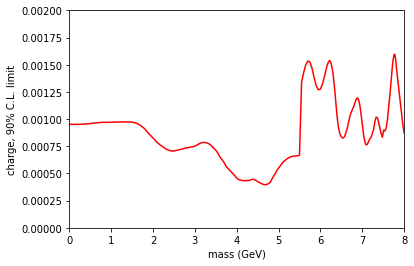

In [12]:
# Same plot as before but now using numpy functions to load the data

import numpy as np
mass, charge = np.loadtxt('BaBar_2016.dat', unpack = True)
plt.plot(mass, charge,'r-')
plt.xlim(0, 8)
plt.ylim(0, 2e-3)
plt.xlabel('mass (GeV)')
plt.ylabel('charge, 90% C.L. limit')
plt.show()

## Practice: Writing and Reading CSV files

CSV stands for Comma Separated Values. Python's `csv` module allows easy reading and writing of sequences. CSV is especially useful for loading data from spreadsheets and databases.

Let's make a list and write a file!  
First, we need to load a new module that you have not used yet in this course: `csv`

In [13]:
import csv

Next, just as before we need to create an abstract file object that opens the file we want to write to.  
Then, we create another programming abstraction called a *csv writer*, a special object that is built specifically to write sequences to our csv file. In this example, we have called the abstract file object `f_csv` and we have called the abstract csv writer object `SA_writer`

In [14]:
f_csv = open( 'nationData.csv', 'w' )
SA_writer = csv.writer( f_csv,                 # write to this file object
                           delimiter = '|',          # place vertical bar between items we write
                           quotechar = '',           # Don't place quotes around strings
                           quoting = csv.QUOTE_NONE )# made up of multiple words 

Make sure that you understand at this point that all we have done is create a writer. It has not written anything to the file yet. So let's try to write the following lists of data:

In [15]:
countries = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana',\
             'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']
capitals = ['Buenos Aires', 'Sucre', 'Brasília', 'Santiago', 'Bogotá', 'Quito', 'Georgetown',\
             'Asunción', 'Lima', 'Paramaribo', 'Montevideo', 'Caracas']
population_mils = [ 42.8, 10.1, 203.4, 16.9, 46.4, 15.0, 0.7, 6.5, 29.2, 0.5,\
                      3.3, 27.6]

Now let's figure out how to add a line to our CSV file. For a regular ASCII file, we added lines by calling the `write` function. For a CSV file, we use a function called `writerow` which is attributed to our abstract csv writer `SA_writer`:

In [16]:
SA_writer.writerow(['Data on South American Nations'])
SA_writer.writerow(['Country', 'Capital', 'Populaton (millions)'])
for i in range(len(countries)):
    SA_writer.writerow( [countries[i], capitals[i], population_mils[i]] )
f_csv.close()

Now let's see if we can open your file using a SpreadSheet program. If you don't have access to one, find someone who does!   

* Download nationData.csv
* Open Microsoft Excel (or equivalent), and select "Import Data."  
* Locate nationData.csv in the list of files that pops up.  
* Select the "Delimited" Option in the next dialog box, and hit "Next"
* Enter the appropriate delimiter in the next pop-up box, and hit finish.

How did we do?

**Practice 5:** Use syntax learned above to generate a csv file called `sine.csv` with pairs of x and y values separated by a comma. It should end up looking sort of like

    0.0,0.0
    1.57079632679,1.00000000
Notice a few things: we don't need to use any formatting of the numbers. It doesn't matter how many decimal places each value has on each line. Python will just use the comma to figure out where one number ends and another begins

In [66]:
f_csv = open( 'sine.csv', 'w' )
SA_writer = csv.writer( f_csv,                 # write to this file object
                           delimiter = '|',          # place vertical bar between items we write
                           quotechar = '',
                           quoting = csv.QUOTE_NONE )# made up of multiple words 
x = np.linspace(0, 2*np.pi, 20)
y = np.sin(x)

for i in range(20):
    print(x[i], y[i])
    #print("%.5f \t %.5f" % (x[i],y[i])) 
    print("%.5f \t %.5f" % (x[i],y[i]) , file=f_csv)
    #print(y) 
f_csv.close()

0.0 0.0
0.3306939635357677 0.32469946920468346
0.6613879270715354 0.6142127126896678
0.992081890607303 0.8371664782625285
1.3227758541430708 0.9694002659393304
1.6534698176788385 0.9965844930066698
1.984163781214606 0.9157733266550575
2.3148577447503738 0.7357239106731318
2.6455517082861415 0.4759473930370737
2.9762456718219092 0.16459459028073403
3.306939635357677 -0.16459459028073378
3.6376335988934447 -0.4759473930370735
3.968327562429212 -0.7357239106731313
4.29902152596498 -0.9157733266550573
4.6297154895007475 -0.9965844930066698
4.960409453036515 -0.9694002659393305
5.291103416572283 -0.8371664782625288
5.621797380108051 -0.614212712689668
5.9524913436438185 -0.32469946920468373
6.283185307179586 -2.4492935982947064e-16


We can use a similar process to *read* data from a csv file back into Python. Let's read in a list of the most populous cities from `cities.csv` and store them for analysis.

In [17]:
cities = []
cityPops = []
metroPops = []

In [18]:
f_csv = open( 'cities.csv', 'r')
readCity = csv.reader( f_csv, delimiter = ',' )

# The following line is how we skip a line in a csv. It is the equivalent of readline from before.
next(readCity) # skip the header row


for row in readCity:
    print(row)
f_csv.close()    

['Shanghai', 'China', '24.3', '24.8']
['Lagos', 'Nigeria', '21.3', '21']
['Delhi', 'India', '16.8', '21.8']
['Istanbul', 'Turkey', '14.4', '14.4']
['Tokyo', 'Japan', '13.3', '36.9']
['Mumbai', 'India', '12.5', '20.7']
['Sao Paulo', 'Brazil', '11.9', '20.9']
['Beijing', 'China', '21.5', '21.1']
['Shenzhen', 'China', '10.8', '10.6']
['Seoul', 'South Korea', '10.3', '25.6']
['Jakarta', 'Indonesia', '10', '10.1']
['Guangzhou', 'China', '9.9', '23.9']
['Mexico City', 'Mexico', '8.9', '21.2']
['Lima', 'Peru', '8.7', '9.9']
['London', 'United Kingdom', '8.5', '14']
['New York City', 'United States', '8.5', '20.1']
['Bengaluru', 'India', '8.4', '8.7']
['Bangkok', 'Thailand', '8.3', '8.3']


Look at the output of the code above. Every `row` that is read in is a `list` of `strings` by default again. So in order to use the numbers *as numbers* we need to convert them using the `float()` operation. Below, we use this to figure out which city has the largest city population:

In [19]:
f_csv = open( 'cities.csv', 'r')
readCity = csv.reader( f_csv, delimiter = ',' )

largest_city_pop = 0.0
city_w_largest_pop = None

# The following line is how we skip a line in a csv. It is the equivalent of readline from before.
next(readCity) # skip the header row


for row in readCity:
    city_country = ', '.join(row[0:2]) # joins the city and country strings using a comma, like "Shanghai, China"
    cityPop =  float(row[2])
    metroPop = float(row[3])
    
    # if the population of this city is the largest seen so far, update
    if cityPop > largest_city_pop:
        largest_city_pop = cityPop
        city_w_largest_pop = city_country
f_csv.close()

print("The city with the largest population is: %s with a population of %.1f million people" % (city_w_largest_pop, largest_city_pop))

The city with the largest population is: Shanghai, China with a population of 24.3 million people


**Practice 6:** Use the syntax learned above to read in the x and y values from your `sine.csv` file. Plot your data to be sure you did everything correctly.

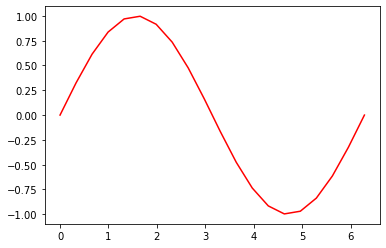

In [67]:
f_csv = open('sine.csv', 'r')

X_values = []
Y_values = []

for line in f_csv:
    tokens = line.split()
    X_values.append(float(tokens[0]))
    Y_values.append(float(tokens[1]))
    #print(line)
    #print(tokens)
f.close()
#print(x_values)
#print(y_values)


plt.plot(X_values, Y_values, 'r')

<a id='exercises'></a>

## Exercises



**Exercise 1:** This exercise is meant to put many of the skills you have practiced thus far together. In this exercise, we are going to use I/O methods to see if we can find some correlations in some fake housing data. You will need the following files which should be in your directory:

    house_locs_rent.txt
    bus_stops.txt
    grocery_stores.txt

The file `house_locs_rent.txt` is a list of the locations of 500 houses and ther respective rents, and it has 3 columns:
    
    x-coordinate y-coordinate rent (in USD)

The file `bus_stops.txt` is a list of the locations of bus stops and it has 2 columns:

    x-coordinate y-coordinate

The file `grocery_stores.txt` is a list of the locaitons of grocery stores and it has 2 columns: 

    x-coordinate y-coordinate

All 3 files have one-line headers that you will want to ignore when loading the data. The goal of the exercise is to determine how much of the variation in the rent is predicted by variation in the distance between a house and its closest bus stop or by the distance between a house and its closest grocery store.

To determine this, for each of the 500 houses, you will need to first calculate its distance to its nearest bus stop and its distance to its nearest grocery store.

Then, we will use a measure called the Pearson correlation coefficient (which you will use in Homework04) to give an estimate of how much of the variation in the rent is predicted by variation in these distances. The Pearson correlation coefficient is defined as follows:

### Correlation Coefficient

Suppose I have $N$ data points each with two variables $X_i$ and $Y_i$, where $i = 1\dots N$. Suppose I want to know how much of the variation in $Y$ is predicted by the variation in $X$. The correlation coefficient $R$ is a value between -1 and 1 with the following meaning: when $R=0$, $X$ and $Y$ are independent of each other. When $R>0$, we say they are positively correlated because if $X$ increases we can expect that $Y$ will increase as well. When $R<0$ we say they are negatively or oppositely correlated because if $X$ increases we can expect that $Y$ will decrease. $R$ is defined as follows:

$$R = \frac{\mathbb{E}[(X_i - \mu_X)(Y_i - \mu_Y)]}{\sigma_X \sigma_Y} = \frac{1}{N \sigma_X \sigma_Y} \sum_{i=1}^N 
(X_i - \mu_X)(Y_i - \mu_Y)$$

where $\mu_X$ is the average of $X_i$ over the dataset, $\mu_Y$ is the average of $Y_i$ over the dataset, $\sigma_X$ is the standard deviation of $X_i$ over the dataset, and $\sigma_Y$ is the standard deviation of $Y_i$ over the dataset. For calculating those quantities, you may find `np.mean()` and `np.std()` helpful.

**However**, you must write your *own* correlation coefficient function. It can use `np.mean()` and `np.std()` but it should not call `np.cov` or `np.corrcoef` . 

**Output:** Your code should contain a function to calculate correlation coefficients as well as any other functions that you want to write (for example, a distance function, a minimum distance function...). The output should be the correlation coefficients between the pairs of variables (minimum distances to bus stops, minimum distances to grocery stores, rents) appropriately labeled. Also, create a CSV file titled `distances_rents.csv` and write the values of the minimum distances to the bus_stop and grocery store for each house along with its rent. For example, if the closest bus stop to the first house is 0.5 away and the closest grocery store to the first house is 1.5 away and the rent of the first house is 1250, then the first line of the CSV should read:

    0.5,1.5,1250

**Optional:** See if you can guess how I generated this fake data. To help sharpen your guess, try transforming the variables before computing the correlation coefficients. If the magnitude of the correlation coefficients goes up, that can be an indicator that you have found the correct form of the function. 

In [23]:
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
#seed(1)
x = 10 * randn(40)
y = randn(40) + 10
#correlation_coefficient = (1/(std(x) * std(y))) * (sum((x - mean(y))*(y - mean(y))))
#print(correlation_coefficient)

"""One of the issues that I came upon was that the data sets had to be the same size which I did not understanwhy that was"""


def cor_eff (m, n):
    #correlation = 1/(std(m) * std(n)) * sum((m - mean(m))*(n - mean(n)))
    correlation = (sum((m-mean(m))*(n-mean(n))))/(sum((x-mean(x))**2)*sum((y-mean(y))**2))**(1/2)
    return correlation

cor_eff(x, y)



-0.1954939604279999

In [28]:
f = open('house_locs_rent.txt', 'r')
x = []

for line in f:
    tokens = line.split()
    x.append((tokens[-1]))
    #Y_values.append(float(tokens[1]))
f.close()


n = open('bus_stops.txt', 'r')
u = []
for line in n:
    tokens = line.split()
    u.append((tokens[-1]))
    #Y_values.append(float(tokens[1]))
f.close()

g = open('grocery_stores.txt', 'r')
w = []
for line in g:
    tokens = line.split()
    w.append((tokens[1]))
    #Y_values.append(float(tokens[1]))
f.close()


f_csv = open( 'distances_rents.csv', 'w' )
house = []
bus = []
stores = []
    
#cor_eff(u, w)
print(u)

for j in range(10):
    print("%.5f \t %.5f" % (u[i],w[i]) , file=f_csv) #this is how I tried to store the values of u and w in the csv file
    print((u[i],w[i]))
    
"""I meant to ask today during workshop but i got busy doing today's workshop; 
I shall explain what i tried to do. I treid to open the three respective files and puul out the data
but this was more complex than I thought (or maybe I just did it wrong), nonetheless when it came 
to putting that data into the csv file and calculating the correlation coefficient I was unable to do 
since I assume I messed up the process. """

['y', '7.50000', '7.50000', '0.00000', '0.00000', '0.00000', '-5.00000', '-5.00000', '-7.50000', '-7.50000', '-7.50000', '0.00000', '5.00000', '5.00000', '5.00000', '5.00000']


TypeError: must be real number, not str

## OPTIONAL: Practice With HDF5 Files

So far you have encountered a standard ASCII text file and a CSV file. The next file format is called an HDF5 file. HDF5 files are ideally suited for managing large amounts of complex data. Python can read them using the module `h5py.`

In [30]:
import h5py

Let's load our first hdf5 file into an abstract file object. We call ours `fh5` in the example below:

In [31]:
fh5 = h5py.File( 'solar.h5py', 'r' )

Here is how data is stored in an HDF5 file:
    hdf5 files are made up of data sets
    Each data set has a name. The correct Python terminology for this is "key". Let's take a look at what data sets are in `solar.h5py`. You can access the names (keys) of these data sets using the `.keys()` function:

In [32]:
for k in fh5.keys(): # loop through the keys
    print(k)

TOrbit_yr
density
mass_earthM
names
solar_AU
surfT_K


To access one of the 6 data sets above, we need to use its name from above. Here we access the data set called `"names"`:

In [33]:
for nm in fh5["names"]: # make sure to include the quotation marks!
    print(nm)

b'Mercury'
b'Venus'
b'Earth'
b'Mars'
b'Jupiter'
b'Saturn'
b'Uranus'
b'Neptune'


So the dataset called `"names"` contains 8 elements (poor Pluto) which are strings. In this HDF5 file, the other data sets contain `float` values, and can be treated like numpy arrays:

In [34]:
print(fh5["solar_AU"][::2])
print(fh5["surfT_K"][fh5["names"]=='Earth'])

[ 0.38709894  1.0000001   5.203363   19.191263  ]
440.0


Let's make a plot of the solar system that shows each planet's:  
* distance from the sun (position on the x-axis)
* orbital period (position on the y-axis
* mass (size of scatter plot marker)
* surface temperature (color of marker)
* density (transparency (or alpha, in matplotlib language))

In [35]:
distAU = fh5["solar_AU"][:]
mass = fh5["mass_earthM"][:]
torb = fh5["TOrbit_yr"][:]
temp = fh5["surfT_K"][:]
rho = fh5["density"][:]
names = fh5["names"][:]

In [36]:
def get_size( ms ):
    m = 400.0/(np.max(mass) - np.min(mass))
    return 100.0 + (ms - np.min(mass))*m 
def get_alpha( p ):
    m = .9/(np.max(rho)-np.min(rho))
    return .1+(p - np.min(rho))*m

In [40]:
alfs = get_alpha(rho)

<ipython-input-41-69754d13b7da>:13: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(-5,200)


Text(0.5, 1.0, 'Our solar system')

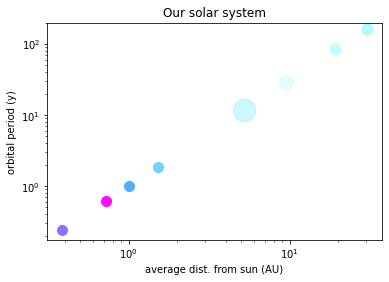

In [41]:
import matplotlib as mpl
import matplotlib.pyplot as plt

norm = mpl.colors.Normalize(vmin=np.min(temp), vmax=np.max(temp))
cmap = plt.cm.cool
m = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

fig, ax = plt.subplots(1)
for i in range(8):
    ax.scatter( distAU[i], torb[i], s = get_size(mass[i]), color = m.to_rgba(temp[i]), alpha=alfs[i] ) 
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(-5,200)
ax.set_ylabel( 'orbital period (y)' )
ax.set_xlabel( 'average dist. from sun (AU)' )
ax.set_title( 'Our solar system' )

Play around with the data and see what interesting relationships you can find!

If you ever want to write your own HDF5 file, you can open an h5py file object by calling:  

    fh5 = h5py.File('filename.h5py', 'w')  
    
Data sets are created with

    dset = fh5.create_dataset( "dset_name", (shape,))
    
The default data type is float.  
The values for the data set are then set with:  

    dset[...] = (  )  
    
where the parenthesis contain an array or similar data of the correct shape. After you've added all your data sets, close the file with  

    fh5.close()  
If you have extra time, try creating your own data set and read it back in to verify that you've done it correctly!

## OPTIONAL: Practice With Binary Files

So far, we've been dealing with text files. If you opened these files up with a text editor, you could see what was written in them. Binary files are different. They're written in a form that Python (and other languages) understand how to read, but we can't access them directly.  The most common binary file you'll encounter in python is a *.npy* file, which stores numpy arrays. You can create these files using the command `np.save( filename, arr )`. That command will store the array `arr` as a file called filename, which should have the extension .npy. We can then reload the data with the command `np.load(filename)`

In [31]:
x = np.linspace(-1, 1.0, 100)
y = np.sin(10*x)*np.exp(-x) - x
xy = np.hstack((x,y))

In [32]:
# save the array
np.save('y_of_x.npy', xy )

In [33]:
del x, y, xy # erase these variables from Python's memory

Now reload the data and check that you can use it just as before.

Bonus challenge! Load the file `mysteryArray.npy`, and figure out the best way to plot it.  
**Hint:** look at the shape of the file, and the dimensions. 

In [34]:
data = np.load('mysteryArray.npy')